### 지역별 분석(DACON DATA 참조)

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.optimize import curve_fit

In [2]:
#DATA LOADS
df = pd.read_csv('C:/Users/PJH/OneDrive/Python/Example/covid19/Covid19_dataset/TimeProvince.csv')
df.shape

(2261, 6)

In [3]:
#DATA pre processing
#각 지역별 확진자 리스트 별로 변수에 저장
Seoul = df.loc[df.province=='Seoul', ['date','confirmed']]
Daejeon = df.loc[df.province=='Daejeon', ['date','confirmed']]
Daegue = df.loc[df.province=='Daegu', ['date','confirmed']]
Busan = df.loc[df.province=='Busan', ['date','confirmed']]
Incheon = df.loc[df.province=='Incheon', ['date','confirmed']]
Gwangju = df.loc[df.province=='Gwangju', ['date','confirmed']]
Seoul.count()

date         133
confirmed    133
dtype: int64

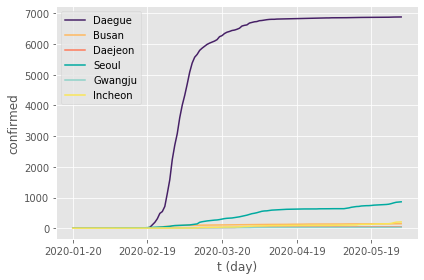

In [4]:
# region comparison

# 컬러 리스트 생성
c = ['#462066', '#FFB85F', '#FF7A5A', '#00AAA0', '#8ED2C9', '#F9E559']

# 지역명 리스트 생성

Rg = ['Daegue', 'Busan', 'Daejeon', 'Seoul', 'Gwangju', 'Incheon']

plt.style.use('ggplot')
fig, ax = plt.subplots()
ax.set_xticks(np.arange(0,132,30))
ax.set_yticks(np.arange(0,10000,1000))
ax.plot(Daegue['date'], Daegue['confirmed'], color=c[0], label=Rg[0] )
ax.plot(Busan['date'], Busan['confirmed'], color=c[1], label=Rg[1])
ax.plot(Daejeon['date'], Daejeon['confirmed'],  color=c[2], label=Rg[2])
ax.plot(Seoul['date'], Seoul['confirmed'], color=c[3], label=Rg[3])
ax.plot(Gwangju['date'], Gwangju['confirmed'], color=c[4], label=Rg[4])
ax.plot(Incheon['date'], Incheon['confirmed'], color=c[5], label=Rg[5])
ax.set_xlabel('t (day)')
ax.set_ylabel('confirmed')
ax.legend(loc='upper left')
plt.tight_layout()
plt.show()

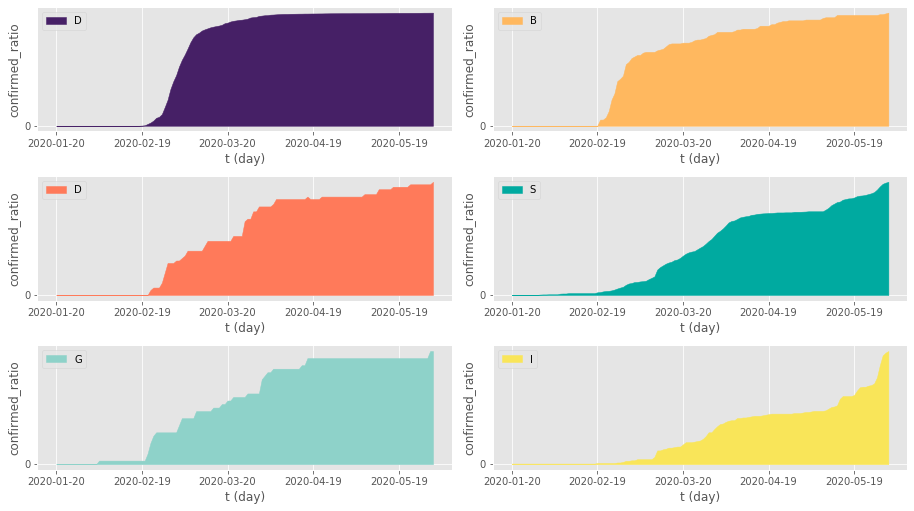

In [5]:
# scale fitting & comparison

fig, ax = plt.subplots(3,2, figsize=(12.8, 7.2))
for i in range(3):
    for j in range(2):
        ax[i,j].set_xticks( np.arange(0,132,30))
        ax[i,j].set_yticks( np.arange(0,1,1))
        
ax[0,0].stackplot(Daegue['date'], Daegue['confirmed'], color=c[0], labels='Daegue' )
ax[0,1].stackplot(Busan['date'], Busan['confirmed'], color=c[1], labels='Busan')
ax[1,0].stackplot(Daejeon['date'], Daejeon['confirmed'],  color=c[2], labels='Daejeon')
ax[1,1].stackplot(Seoul['date'], Seoul['confirmed'], color=c[3], labels='Seoul')
ax[2,0].stackplot(Gwangju['date'], Gwangju['confirmed'], color=c[4], labels='Gwangju')
ax[2,1].stackplot(Incheon['date'], Incheon['confirmed'], color=c[5], labels='Incheon')
for i in range(3):
    for j in range(2):
        ax[i,j].legend(loc='upper left')
        ax[i,j].set_xlabel('t (day)')
        ax[i,j].set_ylabel('confirmed_ratio')

plt.tight_layout()
plt.show()

In [6]:
# logistic approximation
# logistic fitting function define

t = np.arange(0,133,1)

SU = Seoul['confirmed']/Seoul['confirmed'].iloc[-1]
IC = Incheon['confirmed']/Incheon['confirmed'].iloc[-1]
DG = Daegue['confirmed']/Daegue['confirmed'].iloc[-1]
BS = Busan['confirmed']/Busan['confirmed'].iloc[-1]
DJ = Daejeon['confirmed']/Daejeon['confirmed'].iloc[-1]
GJ = Gwangju['confirmed']/Gwangju['confirmed'].iloc[-1]

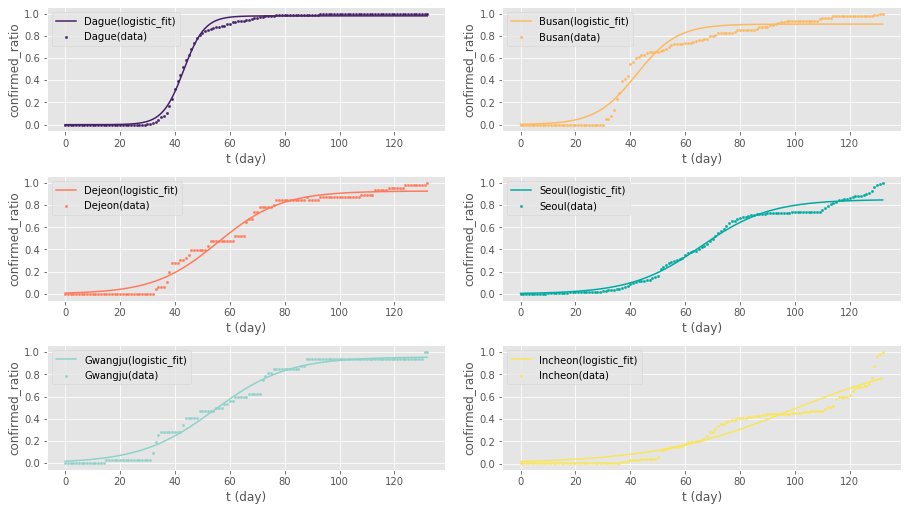

In [7]:
# prameter value extraction

def logistic_fit(t, a, b, c):
    return a/(1+np.exp(-b*(t-c)))
p0 = [1,1,1]
popt_DG, pcov_DG = curve_fit(logistic_fit, t, DG, p0,  maxfev=100000)
popt_BS, pcov_BS = curve_fit(logistic_fit, t, BS, p0,  maxfev=100000)
popt_SU, pcov_SU = curve_fit(logistic_fit, t, SU, p0,  maxfev=100000)
popt_IC, pcov_IC = curve_fit(logistic_fit, t, IC, p0,  maxfev=100000)
popt_DJ, pcov_DJ = curve_fit(logistic_fit, t, DJ, p0,  maxfev=100000)
popt_GJ, pcov_GJ = curve_fit(logistic_fit, t, GJ, p0,  maxfev=100000)

logistic_fit_DG = logistic_fit(t, *popt_DG)
logistic_fit_BS = logistic_fit(t, *popt_BS)
logistic_fit_SU = logistic_fit(t, *popt_SU)
logistic_fit_IC = logistic_fit(t, *popt_IC)
logistic_fit_DJ = logistic_fit(t, *popt_DJ)
logistic_fit_GJ = logistic_fit(t, *popt_GJ)

# visualize
fig, ax = plt.subplots(3,2, figsize=(12.8, 7.2))
ax[0,0].scatter(t, DG, s=5, color=c[0], label='Dague(data)')
ax[0,0].plot(t, logistic_fit_DG, color=c[0], label='Dague(logistic_fit)')
ax[0,1].scatter(t, BS, s=5, color=c[1], label='Busan(data)')
ax[0,1].plot(t, logistic_fit_BS, color=c[1], label='Busan(logistic_fit)')
ax[1,0].scatter(t, DJ, s=5, color=c[2], label='Dejeon(data)' )
ax[1,0].plot(t, logistic_fit_DJ, color=c[2], label='Dejeon(logistic_fit)')
ax[1,1].scatter(t, SU, s=5, color=c[3], label='Seoul(data)' )
ax[1,1].plot(t, logistic_fit_SU, color=c[3], label='Seoul(logistic_fit)')
ax[2,0].scatter(t, GJ, s=5, color=c[4], label='Gwangju(data)')
ax[2,0].plot(t, logistic_fit_GJ, color=c[4], label='Gwangju(logistic_fit)')
ax[2,1].scatter(t, IC, s=5, color=c[5], label='Incheon(data)')
ax[2,1].plot(t, logistic_fit_IC, color=c[5], label='Incheon(logistic_fit)')
for i in range(3):
    for j in range(2):
        ax[i,j].legend()
        ax[i,j].set_xlabel('t (day)')
        ax[i,j].set_ylabel('confirmed_ratio')
plt.tight_layout()
plt.show()

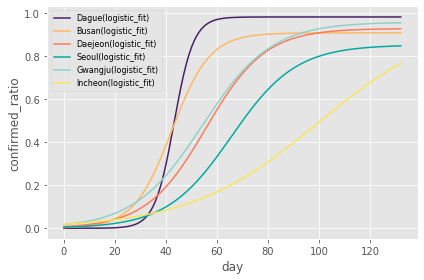

In [8]:
fig, ax = plt.subplots()
ax.plot(t, logistic_fit_DG, color=c[0], label='Dague(logistic_fit)')
ax.plot(t, logistic_fit_BS, color=c[1], label='Busan(logistic_fit)')
ax.plot(t, logistic_fit_DJ, color=c[2], label='Daejeon(logistic_fit)')
ax.plot(t, logistic_fit_SU, color=c[3], label='Seoul(logistic_fit)')
ax.plot(t, logistic_fit_GJ, color=c[4], label='Gwangju(logistic_fit)')
ax.plot(t, logistic_fit_IC, color=c[5], label='Incheon(logistic_fit)')
ax.set_xlabel('day')
ax.set_ylabel('confirmed_ratio')
ax.legend(fontsize=8)
plt.tight_layout()
plt.show()

In [9]:
Rg = ['Daegue', 'Busan', 'Daejeon', 'Seoul', 'Gwangju', 'Incheon']
beta = [popt_DG[1], popt_BS[1], popt_DJ[1], popt_SU[1], popt_GJ[1], popt_IC[1]]

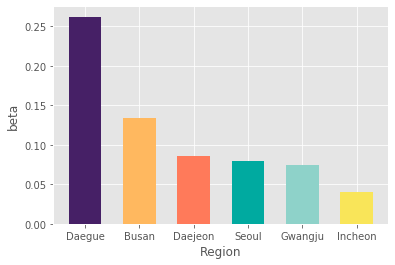

In [10]:
fig, ax = plt.subplots()
ax.bar(Rg, beta, color=c, width=0.6)
ax.set_xlabel("Region")
ax.set_ylabel("beta")
plt.show()

### 수치 해석(SIR model)

In [11]:
# ODE design
def SIR_model(y, t, beta, gamma):
    S, I, R = y
    dS_dt = -beta*S*I
    dI_dt = beta*S*I - gamma*I
    dR_dt = gamma*I
    return([dS_dt, dI_dt, dR_dt])

In [12]:
#출생율 사망율 무시, 감염대상군, 감염군, 회복군 초기 파라미터 설정

s0=[1,1,1,1,1,1]

#초기 확진자는 1명으로 동일한 조건 부여
i0=[1/Daegue['confirmed'].iloc[-1],
    1/Busan['confirmed'].iloc[-1],
    1/Daejeon['confirmed'].iloc[-1],
    1/Seoul['confirmed'].iloc[-1],
    1/Gwangju['confirmed'].iloc[-1],
    1/Incheon['confirmed'].iloc[-1]]

r0=[0,0,0,0,0,0]
gamma=[1/30,1/30,1/30,1/30,1/30,1/30]

In [13]:
#initial conditions
param = pd.DataFrame({'S0': s0,
                      'I0': i0,
                      'R0': r0,
                      'beta': beta,
                      'gamma': gamma
                     })

In [14]:
param

,S0,I0,R0,beta,gamma
0,1,0.000145,0,0.262051,0.033333
1,1,0.006803,0,0.134249,0.033333
2,1,0.021739,0,0.086052,0.033333
3,1,0.001161,0,0.079111,0.033333
4,1,0.031250,0,0.074415,0.033333
5,1,0.004854,0,0.039758,0.033333


In [15]:
for i in range(6):
    S0 = param.iloc[i,0]
    I0 = param.iloc[i,1]
    R0 = param.iloc[i,2]
    beta = param.iloc[i,3]
    gamma = param.iloc[i,4]
    t = np.linspace(0, 132, 133)
    if i == 0:
        sol0 = odeint(SIR_model, [S0, I0, R0], t, args=(beta, gamma))
        sol0 = np.array(sol0)
    if i == 1:
        sol1 = odeint(SIR_model, [S0, I0, R0], t, args=(beta, gamma))
        sol1 = np.array(sol1)
    if i == 2:
        sol2 = odeint(SIR_model, [S0, I0, R0], t, args=(beta, gamma))
        sol2 = np.array(sol2)
    if i == 3:
        sol3 = odeint(SIR_model, [S0, I0, R0], t, args=(beta, gamma))
        sol3 = np.array(sol3)
    if i == 4:
        sol4 = odeint(SIR_model, [S0, I0, R0], t, args=(beta, gamma))
        sol4 = np.array(sol4)
    if i == 5:
        sol5 = odeint(SIR_model, [S0, I0, R0], t, args=(beta, gamma))
        sol5 = np.array(sol5)

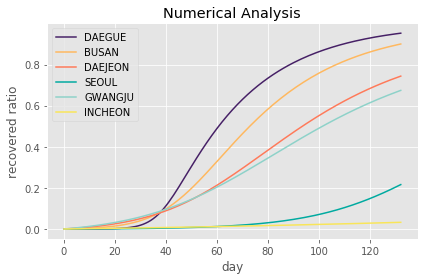

In [16]:
plt.figure()
plt.title("Numerical Analysis")
plt.plot(sol0[:, 2], label='DAEGUE', color=c[0])
plt.plot(sol1[:, 2], label='BUSAN', color=c[1])
plt.plot(sol2[:, 2], label='DAEJEON', color=c[2])
plt.plot(sol3[:, 2], label='SEOUL', color=c[3])
plt.plot(sol4[:, 2], label='GWANGJU', color=c[4])
plt.plot(sol5[:, 2], label='INCHEON', color=c[5])
plt.xlabel('day')
plt.ylabel('recovered ratio')
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()

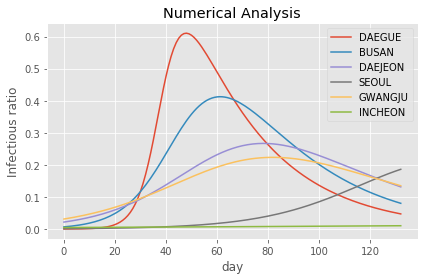

In [17]:
plt.figure()
plt.title("Numerical Analysis")
plt.plot(sol0[:, 1], label='DAEGUE')
plt.plot(sol1[:, 1], label='BUSAN')
plt.plot(sol2[:, 1], label='DAEJEON')
plt.plot(sol3[:, 1], label='SEOUL')
plt.plot(sol4[:, 1], label='GWANGJU')
plt.plot(sol5[:, 1], label='INCHEON')
plt.xlabel('day')
plt.ylabel('Infectious ratio')
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()